In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
Hw1 = pd.read_csv('Validation.csv')
y=Hw1['y'].values
x=Hw1['x'].values.reshape(-1,1)

# LOOCV

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### (a)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)
#we split the given database into 2 pieces as 20% test set and 80% training set.

### (b)

In [6]:
#This function takes degree as parameter. 
#By using it in the loop in the next codes, we separate different degrees and x variables
#into variables as much as degrees and fit them in linear regression.
#We calculate the mse values of trains and validations.

def create_polynomial_regression_model(degree):

  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree,include_bias=False)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_trainv)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_trainv)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on validation data-set
  y_valid_predict = poly_model.predict(poly_features.fit_transform(X_valid))
  
  # evaluating the model on training dataset
  mse_train = mean_squared_error(Y_trainv, y_train_predicted)
  
  # evaluating the model on validation dataset
  mse_valid = mean_squared_error(Y_valid, y_valid_predict)
   
  return (mse_train,mse_valid,degree)

In [7]:
loo = LeaveOneOut()
LeaveOneOutCV=[]
for j in range(1,10):
    LeaveOneOutErrors=[]
    for train_index, validation_index in loo.split(X_train):
        X_trainv, X_valid = X_train[train_index],X_train[validation_index]
        Y_trainv, Y_valid = Y_train[train_index], Y_train[validation_index]
        LeaveOneOutErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (LeaveOneOutErrors,columns=['Training Error','Validation Error','Degree'])
    LeaveOneOutCV.append([df['Validation Error'].mean(),df['Degree'][0]])
LeaveOneOutCV_df = pd.DataFrame (LeaveOneOutCV,columns=['Validation Error','Degree'])
LeaveOneOutCV_df

#Here we have implemented LeaveOneOut. 
#We made the necessary calculations in the create_polynomial_regression_model function for 10 different degrees. 
#We added the mse values and degrees returned from this function to the LeaveOneOutErrors list.
#We also appended the dataframe containing the averages and grades of validation errors to LeaveOneOutCV. 
#We also converted LeaveOneOutCV to the last dataframe and got the output.


,Validation Error,Degree
0,520.607757,1
1,631.287810,2
2,10.591862,3
3,13.638137,4
4,20.684430,5
5,35.716891,6
6,32.185814,7
7,203.269749,8
8,12.044032,9


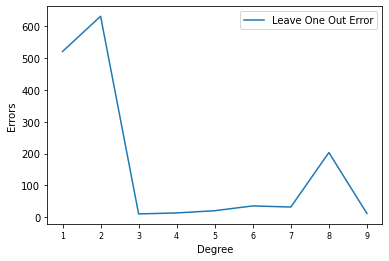

In [8]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(LeaveOneOutCV_df['Degree'].values,LeaveOneOutCV_df['Validation Error'].values,label = 'Leave One Out Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

We visualized what we achieved above. As can be seen from the above outputs and the graph here, we have reached the smallest value at the 3rd degree.

### (c)

Where we got the lowest error, i.e. at level 3, we created the PolynomialFeatures object and assigned it to the variable poly_features. With fit_transform(X_train) we converted it into 3 different variables with the values in X_train and we created a linear regression of the polynomial model by sending y_train with these values. We also performed the transform operation on the x values in the test set and equated it to X_test_poly. Using poly_model we predicted with values in X_test_poly and equated to Y_test_predict. And finally we calculated the mse.

In [9]:

poly_features = PolynomialFeatures(degree=3,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)


X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print("mse of test:",mse_test)

mse of test: 7.106966845948281


# K-FOLD

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

### (d)

Here we do kfold by randomly dividing the set of observations into 10 groups.This progress will find validation error. The cv.split(X_train) in the first loop gives us indexes by working in harmony with the parameter that divides it into 10 parts that we specified in the cv object. Using these indexes, we create the variables X_trainv, X_valid, Y_trainv, Y_valid. Again, we calculate the error with polynomials of different degrees. We find the degree with the smallest error.

In [11]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X_train):
    X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
    for j in range(1,10):
        CVErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
kfoldCV_by_degree = df.groupby("Degree")
kfoldCV_by_degree = kfoldCV_by_degree.mean()
kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
kfoldCV_by_degree[['Degree', 'Validation Error']]

,Degree,Validation Error
0,1,510.305462
1,2,625.153853
2,3,11.227484
3,4,15.718026
4,5,21.904355
5,6,29.672996
6,7,43.053562
7,8,130.560332
8,9,174.685205


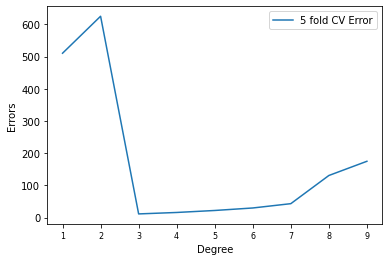

In [12]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_degree['Degree'].values,kfoldCV_by_degree['Validation Error'].values,label = '5 fold CV Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

As can be seen 3 degree gives smallest Validation Error.

### (e)

We created the PolynomialFeatures object and assigned it to the variable poly_features with 3 degree that has the lowest error.  We again refit our model with the degree found. With these values we computed mse and r^2 values.

In [13]:
poly_features = PolynomialFeatures(degree=3,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)

mse_test = mean_squared_error(Y_test, Y_test_predict)

r_square = r2_score(Y_test, Y_test_predict)
print("mse of test:",mse_test,"r^2:",r_square)

mse of test: 7.106966845948281 r^2: 0.960314546926879


### (f)

As we can see the degrees of polynomials chosen with LOOCV and 5-fold cross validation are the same and it is 3.